# Домашнее задание к лекции "Статистика. Практика"
Задание 1
Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?

2) Критикам нравятся больше игры на PC или на PS4?

3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

сформулируйте нулевую и альтернативную гипотезы;
выберите пороговый уровень статистической значимости;
опишите полученные результаты статистического теста.

Задание 2
Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;

2) Удалите мусорные символы;

3) Удалите стоп-слова;

4) Привидите все слова к нормальной форме;

5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
Можете поэкспериментировать с параметрами TfidfVectorizer;

6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;

7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;

8) Опишите результаты при помощи confusion_matrix;

9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
games = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/vgsales.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# 1.1

In [16]:
games_sport = games.loc[games['Genre'] == 'Sports']

display(games_sport['Critic_Score'].mean())

mean_ = games['Critic_Score'].mean()
mean_


71.96817420435511

68.96767850559173

H0: средняя оценка Игр жанра спорт <= средней оценке игр в целом  
H1: средняя оценка Игр жанра спорт > средней оценки игр в целом  

In [25]:
from scipy import stats as st
alpha = 0.05
result = st.ttest_1samp(games_sport['Critic_Score'], mean_)#, alternative ='greater')


if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, оценки ниже')
else:
    print('Не отвергаем нулевую нулевую гипотезу, оценки выше')

Не отвергаем нулевую нулевую гипотезу, оценки выше


<Figure size 1080x720 with 0 Axes>

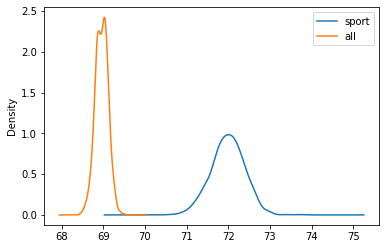

In [30]:
plt.figure(figsize=(15, 10))

boot_1d_sport = []
boot_1d_all = []
for i in range(1000):
    boot_mean_sport = games_sport['Critic_Score'].sample(frac = 1, replace = True).mean()  
    boot_1d_sport.append(boot_mean_sport)
    boot_mean_all = games['Critic_Score'].sample(frac = 1, replace = True).mean() 
    boot_1d_all.append(boot_mean_all)

boot_1d = {'sport': boot_1d_sport, 'all': boot_1d_all}

boot_1d = pd.DataFrame(boot_1d)
   
boot_1d.plot(kind='density')
plt.show()

Средние оценки за игры в категории спорт выше чем просто средние оценки

# 1.2

In [33]:
games_pc = games.loc[games['Platform'] == 'PC']
games_ps4 = games.loc[games['Platform'] == 'PS4']

H0: критикам неважно какая платформа
H1: оценка по платформам разная

In [29]:
result = st.ttest_ind(games_pc['Critic_Score'], games_ps4['Critic_Score'], equal_var=False)

alpha = 0.05
if (result.pvalue < alpha):
    print('Не отвергаем нулевую гипотезу, платформа неважна')    
else:
    print('Отвергаем нулевую гипотезу, оценка по платформам разная')

Отвергаем нулевую гипотезу, оценка по платформам разная


<Figure size 1080x720 with 0 Axes>

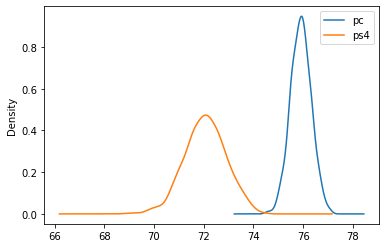

In [31]:
plt.figure(figsize=(15, 10))

boot_1d_pc = []
boot_1d_ps4 = []
for i in range(1000):
    boot_mean_pc = games_pc['Critic_Score'].sample(frac = 1, replace = True).mean()  
    boot_1d_pc.append(boot_mean_pc)
    boot_mean_ps4 = games_ps4['Critic_Score'].sample(frac = 1, replace = True).mean() 
    boot_1d_ps4.append(boot_mean_ps4)

boot_1d = {'pc': boot_1d_pc, 'ps4': boot_1d_ps4}

boot_1d = pd.DataFrame(boot_1d)
   
boot_1d.plot(kind='density')
plt.show()

Оценки на платформе pc выше, чем на ps4

# 1.3

In [37]:
games_shoot = games.loc[games['Genre'] == 'Shooter']
games_strat = games.loc[games['Genre'] == 'Strategy']

H0: критикам без разницы какой жанр 
H1: жанр имеет значение

In [40]:
result = st.ttest_ind(games_shoot['Critic_Score'], games_strat['Critic_Score'], equal_var=False)

alpha = 0.05
if (result.pvalue < alpha):
    print('Не отвергаем нулевую гипотезу, жанр неважен')    
else:
    print('Отвергаем нулевую гипотезу, жанр играет роль')

Отвергаем нулевую гипотезу, жанр играет роль


<Figure size 1080x720 with 0 Axes>

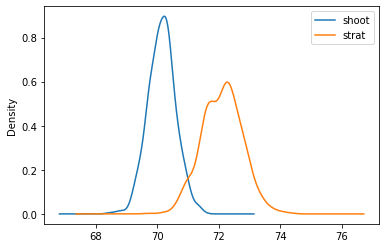

In [41]:
plt.figure(figsize=(15, 10))

boot_1d_shoot = []
boot_1d_strat = []
for i in range(1000):
    boot_mean_shoot = games_shoot['Critic_Score'].sample(frac = 1, replace = True).mean()  
    boot_1d_shoot.append(boot_mean_shoot)
    boot_mean_strat = games_strat['Critic_Score'].sample(frac = 1, replace = True).mean() 
    boot_1d_strat.append(boot_mean_strat)

boot_1d = {'shoot': boot_1d_shoot, 'strat': boot_1d_strat}

boot_1d = pd.DataFrame(boot_1d)
   
boot_1d.plot(kind='density')
plt.show()

Оценки стратегий выше шутеров

# 2

In [157]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix

text = pd.read_csv('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/stat_case_study/spam.csv').head(20)
text.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [158]:
# приведем все слова к нижнему регистру

text['Message'] = text['Message'].str.lower()
text.head()

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [159]:
# мусорные символы

text['Message'] = text['Message'].apply(lambda x: re.sub('[\W_]+',' ', x))
text.head()

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


In [160]:
import nltk

In [161]:
# разделение

text['Message'] = text['Message'].apply(lambda x: x.split())
text.head()

,Category,Message
0,ham,"[go, until, jurong, point, crazy, available, o..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"[nah, i, don, t, think, he, goes, to, usf, he,..."


In [162]:
#стоп-слова

stop_words = set(stopwords.words('english'))
text['Message'] = text['Message'].apply(lambda x: [word for word in x if word not in stop_words])
text.head()

,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, goes, usf, lives, around, though]"


In [163]:
from nltk.stem import WordNetLemmatizer

In [164]:
# лемматизация

nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()
text['Message'] = text['Message'].apply(lambda x: [wordnet_lemmatizer.lemmatize(word) for word in x])
text.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Category,Message
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, think, go, usf, life, around, though]"


In [165]:
# вернем словам обычный вид

text['Message'] = text['Message'].apply(lambda x: " ".join(str(word) for word in x))
text.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [170]:
# вектора TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(text['Message'] )
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [171]:
tfidf_matrix.shape

(20, 208)

In [173]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, text['Category'], test_size=0.30, random_state=42)

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
# Логистическая регрессия

logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
print({logreg.score(X_test, y_test)})

{0.5}


In [177]:
#confusion_matrix

confusion_matrix(y_test, logreg.predict(X_test))

array([[3, 0],
       [3, 0]], dtype=int64)

Слишком мало данных, чтобы что то сказать

In [184]:
#dataframe

text_classified = text.copy()

text_classified['train_class'] = pd.Series(logreg.predict(X_test))

text_classified

,Category,Message,train_class
0,ham,go jurong point crazy available bugis n great ...,ham
1,ham,ok lar joking wif u oni,ham
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,ham
3,ham,u dun say early hor u c already say,ham
4,ham,nah think go usf life around though,ham
5,spam,freemsg hey darling 3 week word back like fun ...,ham
6,ham,even brother like speak treat like aid patent,NaN
7,ham,per request melle melle oru minnaminunginte nu...,NaN
8,spam,winner valued network customer selected receiv...,NaN
9,spam,mobile 11 month u r entitled update latest col...,NaN
